**K-Means Clustering in Python with scikit-learn**
The training set contains several records about the passengers of Titanic (hence the name of the dataset). It has 12 features capturing information about passenger_class, port_of_Embarkation, passenger_fare etc. The dataset's label is survival which denotes the survivial status of a particular passenger. Your task is to cluster the records into two i.e. the ones who survived and the ones who did not.
Drop the 'survival' column from the dataset and make it unlabeled. It's the task of K-Means to cluster the records of the datasets if they survived or not.
 you will need the following Python packages: pandas, NumPy, scikit-learn, Seaborn and Matplotlib.


In [ ]:
# Dependencies
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the train and test datasets to create two DataFrames
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)


In [ ]:
# Let's preview the kind of data you will be working with by printing some samples from both the train and test DataFrames.
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())



***** Train_Set *****
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


***** Test_Set *****
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


In [ ]:
# Initial statistics of both the train and test DataFrames using pandas' describe() method.
print(train.columns.values)

print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
***** Train_Set *****
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


***** Test_Set *****
       PassengerId      Pclass         Age       SibSp       Parch    

In [ ]:
# Analyze missing values in the datasets

# where are they ?
# For the train set

train.isna().head()

# For the test set

test.isna().head()

# Their numbers
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())


*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Missing values impoutation 

# Fill missing values with mean column values in the train set
train.fillna(train.mean(), inplace=True)
# Fill missing values with mean column values in the test set
test.fillna(test.mean(), inplace=True)

# Check if that's ok
print(train.isna().sum())

# Still missing values for categorical variables

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Check  survival count of passengers with respect to the some features: Pclass, Sex, SibSp, Parch

train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
#  By Pclass
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**TODO**
Do the same for SibSp

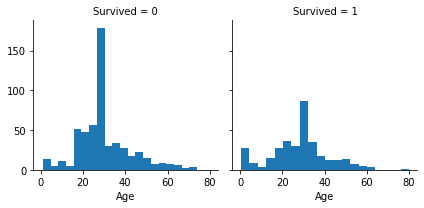

In [ ]:
# Some Graphics
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


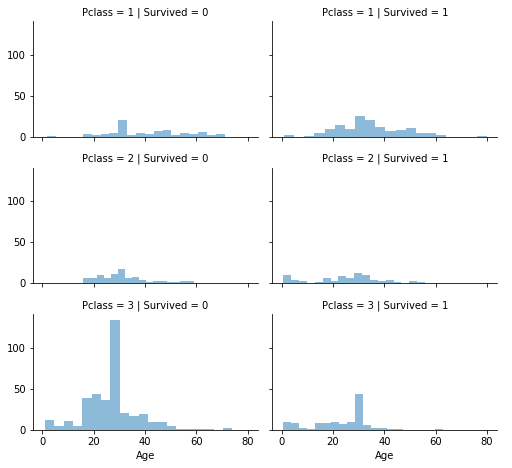

In [ ]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# Preprocessing data set for kmeans

In [ ]:
train.info()
# You can see that Name, Sex, Ticket, Cabin, Embarked are not numerical
# We drop all of them except Sex that we convert to numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
DD = train.drop(['Name','Ticket', 'Cabin','Embarked','PassengerId'], axis=1)
DD2 = test.drop(['Name','Ticket', 'Cabin','Embarked','PassengerId'], axis=1)


labelEncoder = LabelEncoder()
labelEncoder.fit(DD['Sex'])
labelEncoder.fit(DD2['Sex'])
DD['Sex'] = labelEncoder.transform(DD['Sex'])
DD2['Sex'] = labelEncoder.transform(DD2['Sex'])


In [ ]:
# You can first drop the Survival column from the data with the drop() function.
X = np.array(DD.drop(['Survived'], 1).astype(float))
y = np.array(DD['Survived'])
print(X.shape)

(891, 6)


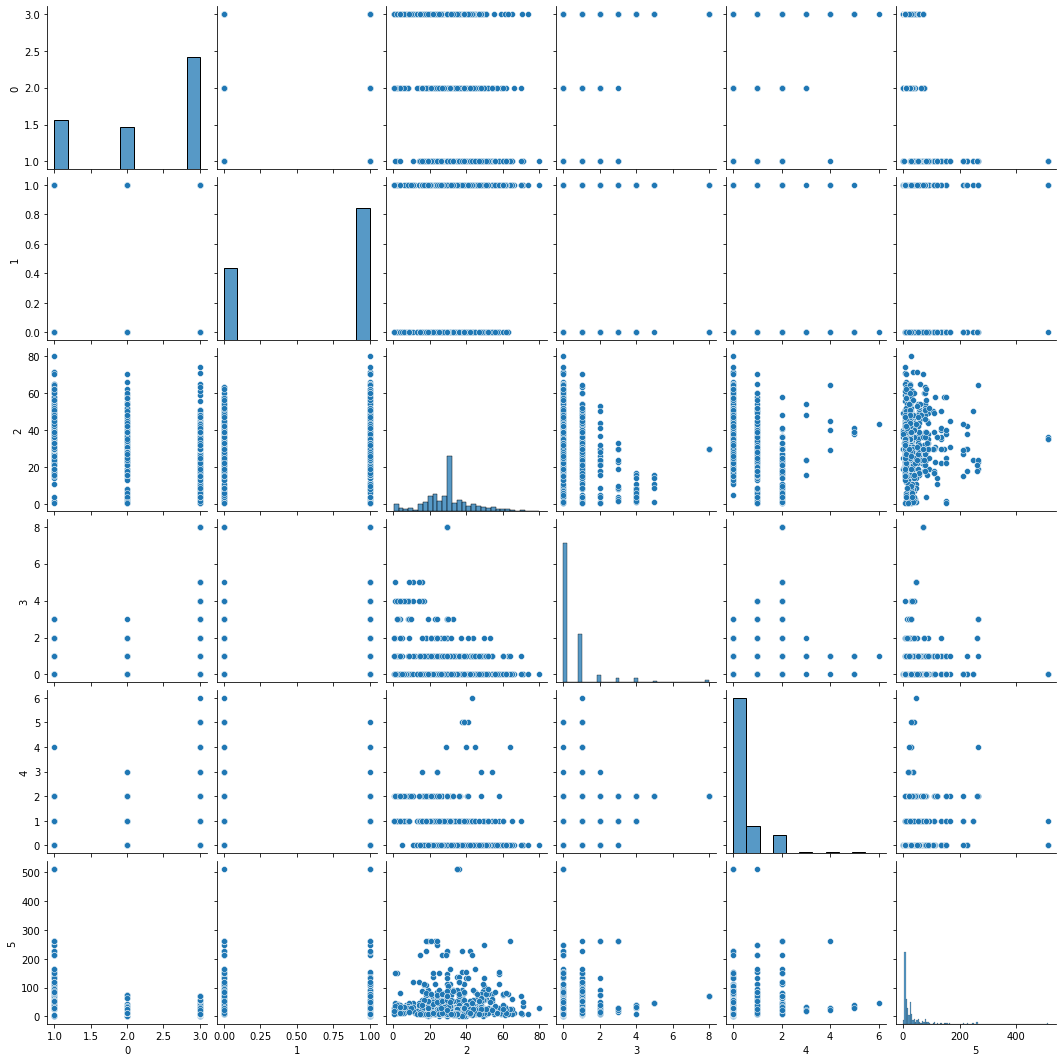

In [ ]:
import seaborn as sns
sns.pairplot(pd.DataFrame(X)) 

In [ ]:
km = KMeans(n_clusters=2) 
# You want cluster the passenger records into 2and check if they correspond to  Survived or Not survived
km.fit(X)
print(km.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

**TODO**
You can compare kmeans labelling with the survival status
* Look at the confusion matrix using confusion_matrix() from sklearn.metrics
* You can compute the adjusted_rand_score() from sklearn.metrics.cluster import 
* Does scaling affect the result ? use a scaling approach like MinMaxScaler()